# BIKE SHARING ASSIGNMENT

In [1]:
# Importing requisite modules
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import statsmodels
import sklearn

In [2]:
# To display the data of all the columns of the dataset in output
pd.set_option('display.max_columns', 100)

## Reading and Understanding the Data

In [3]:
# Reading the dataset
bike = pd.read_csv('day.csv')

In [4]:
# Checking the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Checking the shape of the dataset
bike.shape

(730, 16)

In [6]:
# Checking the info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking the statistics of the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Replacing the Category code with a specific Category name of 'season', 'mnth', 'weekday' and 'weathersit' columns
# It will help us for dummy coding and visualizing the data
bike['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'}, inplace = True)


In [9]:
# Checking the count of season column
bike['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [10]:
bike['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace=True)


In [11]:
# Checking the count of mnth column
bike['mnth'].value_counts()

Mar    62
Jul    62
Aug    62
Jan    62
May    62
Dec    62
Oct    62
Apr    60
Nov    60
Sep    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [12]:
bike['weekday'].replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'},inplace=True)


In [13]:
# Checking the count of wwekday column
bike['weekday'].value_counts()

Tue    105
Mon    105
Fri    104
Wed    104
Sat    104
Thu    104
Sun    104
Name: weekday, dtype: int64

In [14]:
bike['weathersit'].replace({1:'Clear',2:'Mist',3:'Light_Rain/Snow',4:'Heavy_Rain'}, inplace=True)

In [15]:
# Checking the count of weathersit column
bike['weathersit'].value_counts()

Clear              463
Mist               246
Light_Rain/Snow     21
Name: weathersit, dtype: int64

In [16]:
# Checking the count of yr column
bike['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [17]:
# Checking the count of holiday column
bike['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [18]:
# Checking the count of workingday column
bike['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

## Visualizing the Data

It will help us in understanding the multicollinearity that exists in the data and will also help us in finding the predictors that has strong relationship with the outcome variable.

#### Visualizing the continous variable

In [21]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

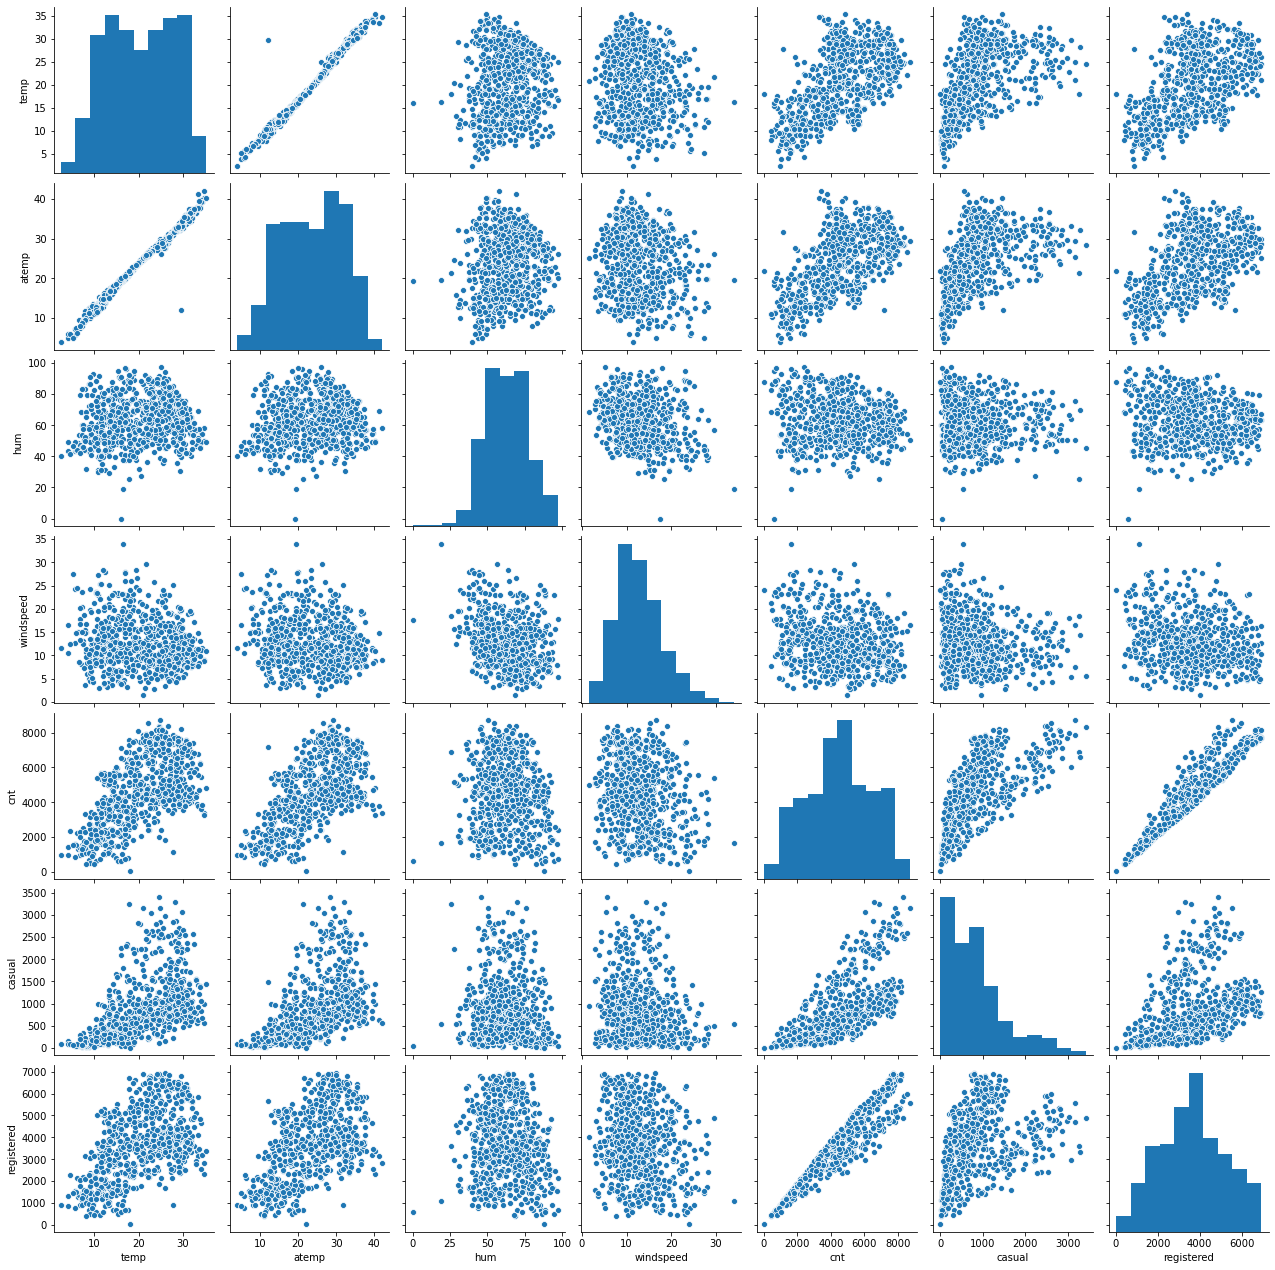

In [22]:
# Visualizing the pairplot of continous variable
sns.pairplot(bike[['temp','atemp','hum','windspeed','cnt','casual','registered']])
plt.show()

In [23]:
# Converting dteday column to pandas date time format
bike['dteday'] = pd.to_datetime(bike['dteday'])

In [24]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Visualizing the Categorical Variables

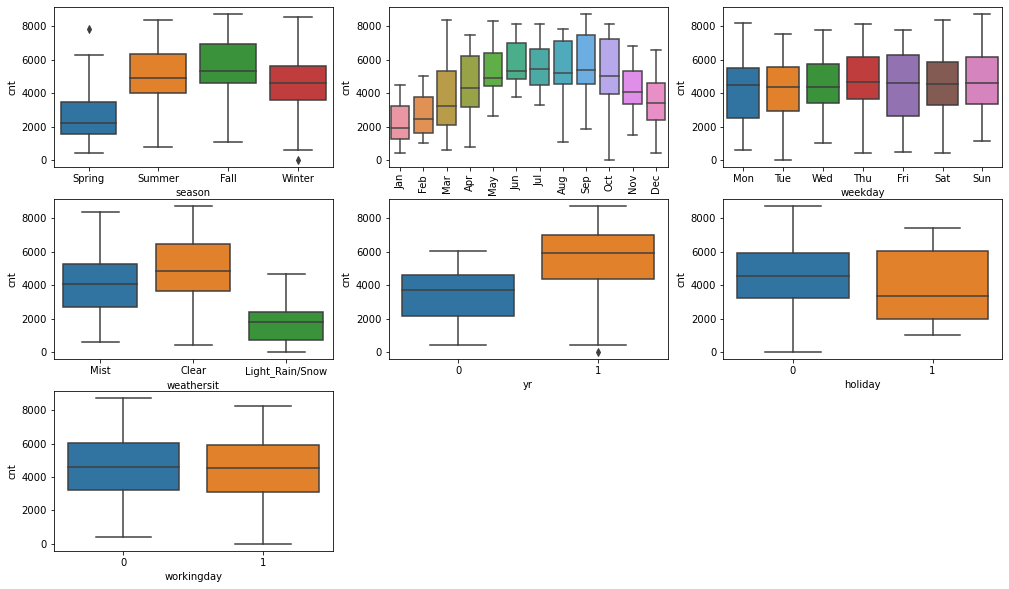

In [25]:
plt.figure(figsize=(17,10))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='yr', y='cnt', data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.subplot(3,3,7)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.show()

#### It is observed that cnt is high in the following situations:
    1) season is 'Fall'
    2) month is 'Sep'
    3) weekday is 'Fri'
    4) weather is 'Clear'
    5) in the year '2019'

It is also observed that median of cnt is high when its not a holiday and cnt is almost same for whether its working day or not.

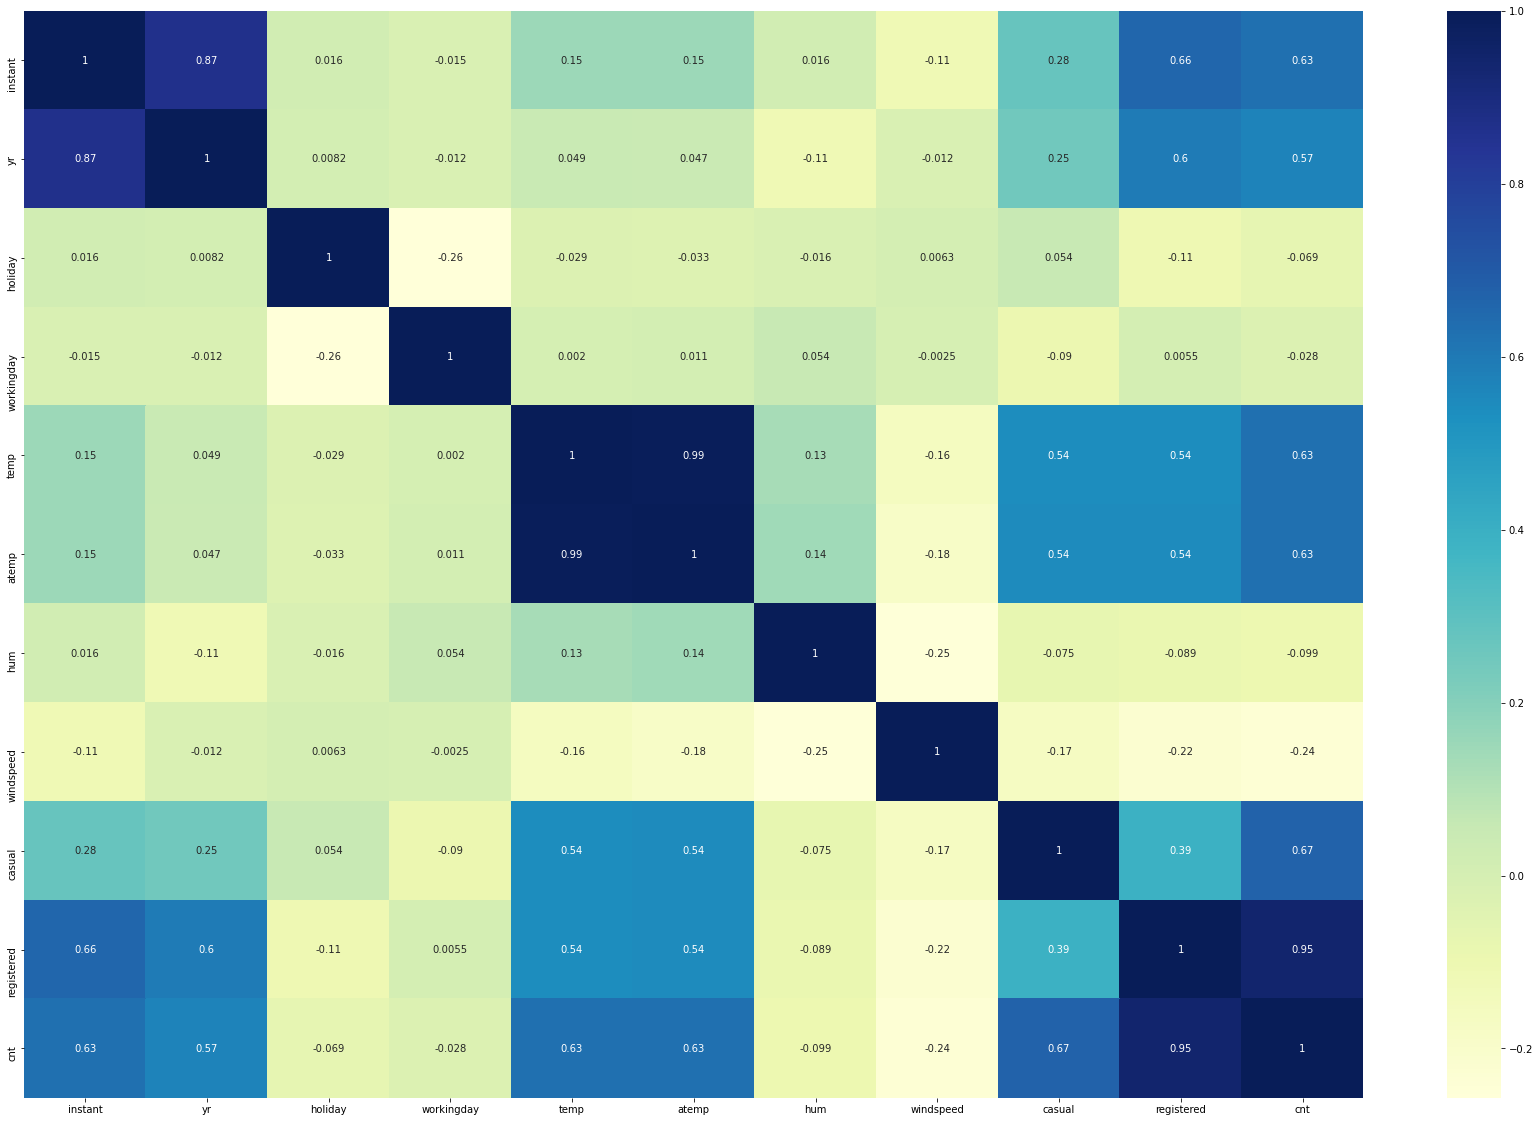

In [26]:
plt.figure(figsize=(30,20))
sns.heatmap(bike.corr(), annot=True, cmap='YlGnBu')
plt.show()

It is observed that cnt is highly correlated with registered, casual, temp and atemp columns and among them registered is the most

In [27]:
# Dropping registered and atemp columns
bike.drop(['registered'], axis=1, inplace=True)

In [28]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,2018-01-01,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,985
1,2,2018-02-01,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,801
2,3,2018-03-01,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1349
3,4,2018-04-01,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1562
4,5,2018-05-01,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1600


## Data Preparation

In [29]:
# Creating Dummy Variable of the 'season' column and store it in a new variable 'seas'
seas = pd.get_dummies(bike['season'], drop_first=True)

# Adding the results to the original dataframe 'bike'
bike = pd.concat([bike,seas], axis=1)

# Dropping the 'season' column as we have created dummies for it.
bike.drop(['season'], axis=1, inplace=True)

In [30]:
#Checking the head of the dataset
bike.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt,Spring,Summer,Winter
0,1,2018-01-01,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,985,1,0,0
1,2,2018-02-01,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,801,1,0,0
2,3,2018-03-01,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1349,1,0,0
3,4,2018-04-01,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1562,1,0,0
4,5,2018-05-01,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1600,1,0,0


In [31]:
# Creating Dummy Variable of the 'mnth' column and store it in a new variable 'month'
month = pd.get_dummies(bike['mnth'], drop_first=True)

# Adding the results to the original dataframe 'bike'
bike = pd.concat([bike,month], axis=1)

# Dropping the 'mnth' column as we have created dummies for it.
bike.drop(['mnth'], axis=1, inplace=True)

In [32]:
#Checking the head of the dataset
bike.head()

,instant,dteday,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,2018-01-01,0,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,2018-02-01,0,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,2018-03-01,0,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,2018-04-01,0,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,2018-05-01,0,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [33]:
# Creating Dummy Variable of the 'weekday' column and store it in a new variable 'day'
day = pd.get_dummies(bike['weekday'], drop_first=True)

# Adding the results to the original dataframe 'bike'
bike = pd.concat([bike,day], axis=1)

# Dropping the 'mnth' column as we have created dummies for it.
bike.drop(['weekday'], axis=1, inplace=True)

In [34]:
#Checking the head of the dataset
bike.head()

,instant,dteday,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,1,2018-01-01,0,0,1,Mist,14.110847,18.18125,80.5833,10.749882,331,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,2018-02-01,0,0,1,Mist,14.902598,17.68695,69.6087,16.652113,131,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,2018-03-01,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,2018-04-01,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,2018-05-01,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# Creating Dummy Variable of the 'weathersit' column and store it in a new variable 'weather'
weather = pd.get_dummies(bike['weathersit'], drop_first=True)

# Adding the results to the original dataframe 'bike'
bike = pd.concat([bike,weather], axis=1)

# Dropping the 'mnth' column as we have created dummies for it.
bike.drop(['weathersit'], axis=1, inplace=True)

In [36]:
#Checking the head of the dataset
bike.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Rain/Snow,Mist
0,1,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,131,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
# dropping dteday and instant columns from the dataframe as they won't be useful for building the model
bike.drop(['dteday','instant'], axis=1, inplace=True)

In [38]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Rain/Snow,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Spliting into Training and Test Sets

In [39]:
# Calling the train_test-split function from sklearn module
from sklearn.model_selection import train_test_split

In [40]:
# Splitting the Bike dataset into Training and Test Sets
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size=0.7, test_size=.3, random_state=100)

In [41]:
# Checking the head of the training set
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Rain/Snow,Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,922,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,968,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,956,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,364,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,1120,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [42]:
# Calling the StandardScaler function from the sklearn module
from sklearn.preprocessing import MinMaxScaler

In [43]:
#Instantiating the object
scaler = MinMaxScaler()

In [44]:
bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'cnt', 'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed', 'Light_Rain/Snow', 'Mist'],
      dtype='object')

In [45]:
# Combining all the Numeric Columns for applying scaling
num_features = ['temp','atemp','hum','windspeed','cnt','casual']

In [46]:
# Fitting and transforming the train data
bike_train[num_features] = scaler.fit_transform(bike_train[num_features])

In [47]:
# Checking the head of the training data set
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Rain/Snow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [48]:
# Checking the statistics of the training data set
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Rain/Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.254661,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.206011,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


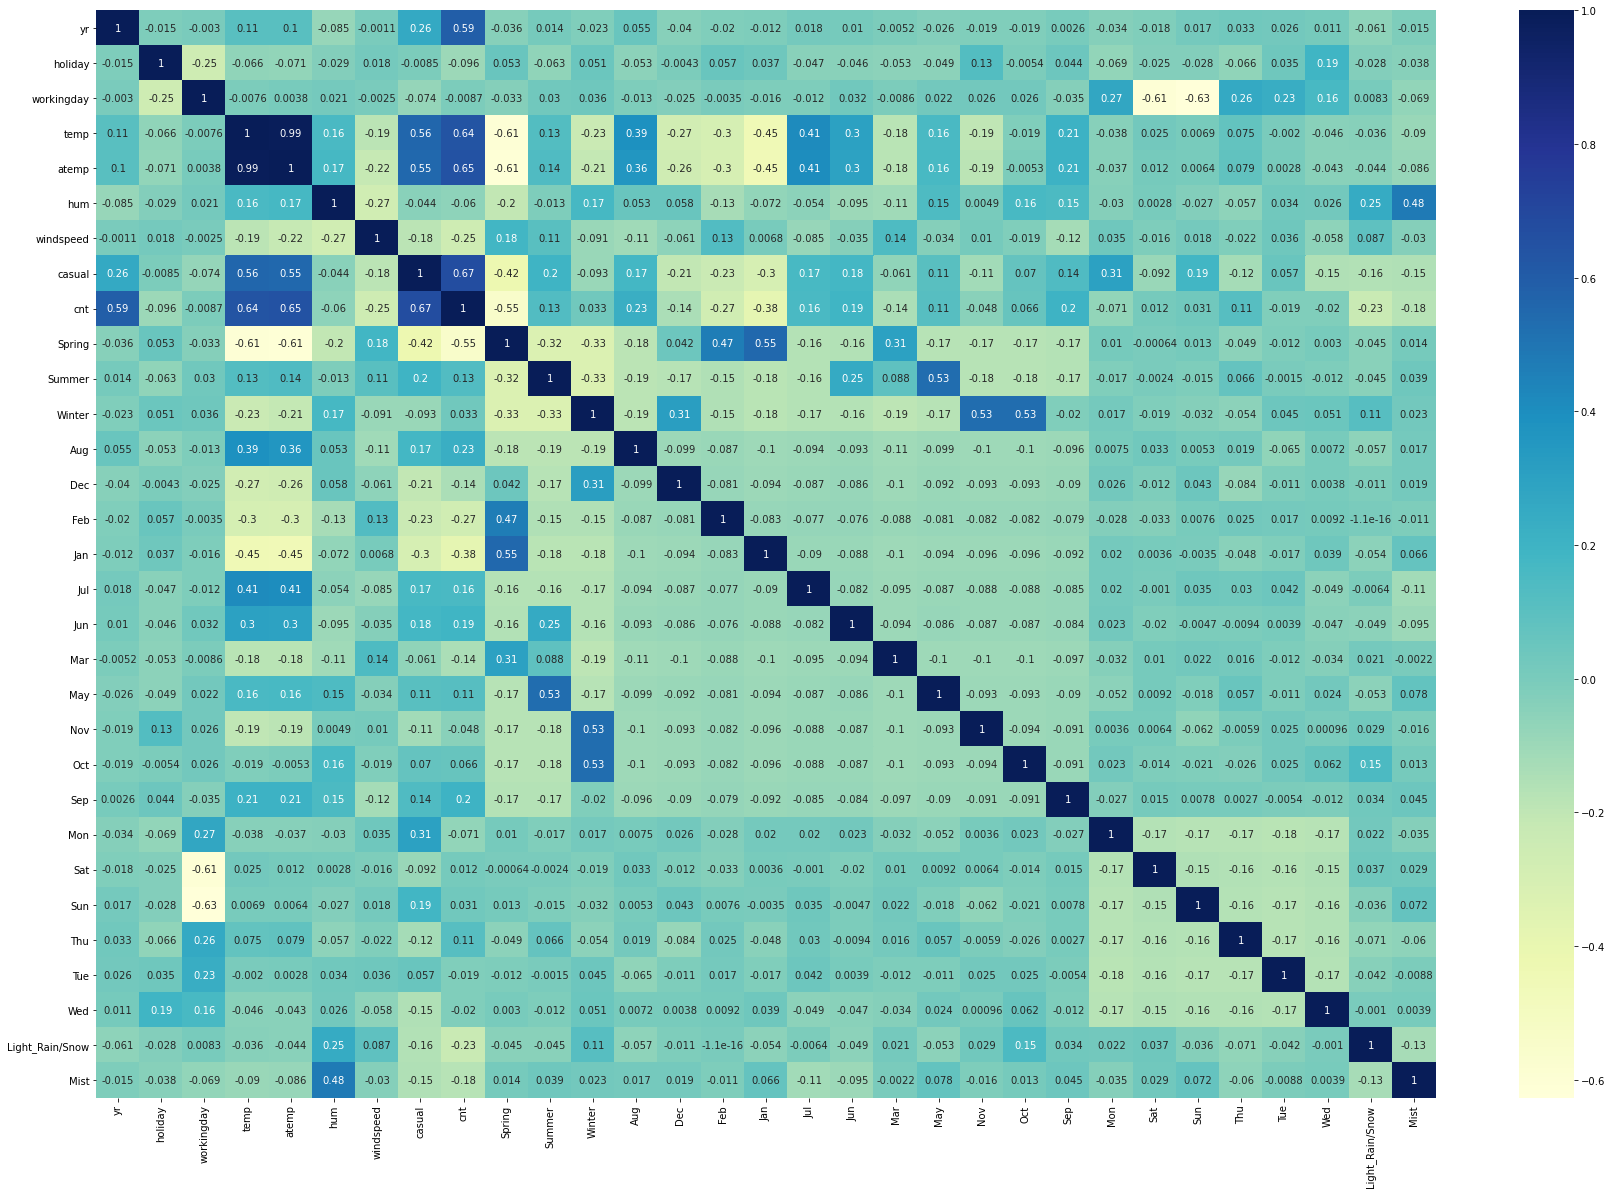

In [49]:
# Checking the correlation cofficient among the independent variables of the training data set
plt.figure(figsize=(30,20))
sns.heatmap(bike_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

It is observed that variables `temp` and `atemp` are highly correlated. Since both both of them are representating the common, i.e., temparature, so dropping the `atemp` variable from the training data set

In [50]:
# Dropping the 'atemp' variable from the training data set
bike_train.drop(['atemp'], axis=1, inplace=True)

In [51]:
# Checking the head of the training data set
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Rain/Snow,Mist
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.110332,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Dividing into X and y sets for Model Building

In [52]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Building a Linear Model

### Using the automated Feature Selection Method (RFE) to extact the top 15 features for model building

In [53]:
# Importing RFE and LinearRegression functions from the sklearn module
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
# Creating the object 'lm' for linear regression and fitting the training data set
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

# Extracting the top 15 features using the RFE function and fitting the training data set to rfe
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train,y_train)

In [55]:
# Creating a list where each element is the combination of column name of X_train data set alongwith rfe support status and ranking
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 13),
 ('Winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 9),
 ('Feb', False, 10),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 6),
 ('Mar', False, 15),
 ('May', False, 3),
 ('Nov', False, 4),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 11),
 ('Sun', True, 1),
 ('Thu', False, 5),
 ('Tue', True, 1),
 ('Wed', False, 14),
 ('Light_Rain/Snow', True, 1),
 ('Mist', True, 1)]

In [56]:
# List of top 15 independent variables from the X_train data set which are supported by RFE and store it in a new variable 'col'
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'casual', 'Spring',
       'Winter', 'Jul', 'Sep', 'Mon', 'Sun', 'Tue', 'Light_Rain/Snow', 'Mist'],
      dtype='object')


In [57]:
# List of the independent variables from the X_train data set which are not supported by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'Summer', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sat', 'Thu', 'Wed'],
      dtype='object')

### Building Model using StatsModel, for the detailed statistics

In [58]:
# Importing the statsmodel api
import statsmodels.api as sm

# Importing variance_inflation_factor from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Creating X_train dataframe using the RFE selected features
X_train_rfe = X_train[col]

In [60]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,casual,Spring,Winter,Jul,Sep,Mon,Sun,Tue,Light_Rain/Snow,Mist
653,1,0,0.509887,0.575354,0.300794,0.280402,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0.294422,0,0,1,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0.290765,1,0,0,0,0,1,0,0,1
728,1,0,0.245101,0.498067,0.663106,0.110332,1,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.340750,0,0,0,0,0,1,0,0,1


### MODEL 1

In [61]:
# Adding the constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Creating the 1st fitted model
lm = sm.OLS(y_train, X_train_rfe).fit()



In [62]:
# Printing the coeffcient and intercept value
print(lm.params)

const              0.310378
yr                 0.199251
holiday           -0.127541
temp               0.316961
hum               -0.111284
windspeed         -0.108615
casual             0.387052
Spring            -0.075515
Winter             0.066991
Jul               -0.043897
Sep                0.056062
Mon               -0.118079
Sun               -0.057985
Tue               -0.064454
Light_Rain/Snow   -0.195861
Mist              -0.040628
dtype: float64


In [63]:
# Printing a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     266.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.46e-225
Time:                        23:38:40   Log-Likelihood:                 600.96
No. Observations:                 510   AIC:                            -1170.
Df Residuals:                     494   BIC:                            -1102.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3104      0.026     

In [64]:
# Since the p-values of all the features is less than 0.05, so lets check the VIF value
X_train_new = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,22.76
2,temp,19.55
5,casual,6.57
4,windspeed,4.21
6,Spring,2.61
14,Mist,2.31
0,yr,2.28
7,Winter,2.10
10,Mon,1.85
11,Sun,1.52


### MODEL 2

#### Creating the 2nd model by dropping the `hum` feature as the VIF values if greater than 10 and greatest among all the considered variables

In [65]:
# Dropping the 'hum' feature
X_train_lm = X_train_rfe.drop(["hum"], axis = 1)

In [66]:
# Adding the constant
X_train_lm = sm.add_constant(X_train_lm)

# Creating the 2nd fitted model
lm = sm.OLS(y_train, X_train_lm).fit()

In [67]:
# Printing the coeffcient and intercept value
print(lm.params)

const              0.250307
yr                 0.201272
holiday           -0.128180
temp               0.292701
windspeed         -0.086158
casual             0.394749
Spring            -0.077616
Winter             0.060610
Jul               -0.037898
Sep                0.053668
Mon               -0.119965
Sun               -0.057759
Tue               -0.067654
Light_Rain/Snow   -0.225214
Mist              -0.058107
dtype: float64


In [68]:
# Printing a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     277.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          6.08e-224
Time:                        23:39:06   Log-Likelihood:                 594.70
No. Observations:                 510   AIC:                            -1159.
Df Residuals:                     495   BIC:                            -1096.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2503      0.020     

In [69]:
# Since the p-values of all the features is less than 0.05, so lets check the VIF value
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,8.40
4,casual,6.56
3,windspeed,4.20
0,yr,2.28
9,Mon,1.83
5,Spring,1.77
13,Mist,1.60
10,Sun,1.52
6,Winter,1.44
7,Jul,1.39


### MODEL 3

#### Creating the 3rd model by dropping the `temp` feature as the VIF value is greater than 5 and greatest among all the considered variables

In [70]:
# Dropping the 'temp' feature
X_train_lm = X_train_lm.drop(["temp"], axis = 1)

In [71]:
# Adding the constant
X_train_lm = sm.add_constant(X_train_lm)

# Creating the 3rd fitted model
lm = sm.OLS(y_train, X_train_lm).fit()

In [72]:
# Printing the coeffcient and intercept value
print(lm.params)

const              0.418569
yr                 0.199792
holiday           -0.137783
windspeed         -0.095739
casual             0.503527
Spring            -0.156391
Winter             0.010008
Jul                0.020161
Sep                0.073364
Mon               -0.150234
Sun               -0.078436
Tue               -0.079994
Light_Rain/Snow   -0.213583
Mist              -0.057623
dtype: float64


In [75]:
# Printing a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     236.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.36e-203
Time:                        23:39:26   Log-Likelihood:                 541.66
No. Observations:                 510   AIC:                            -1055.
Df Residuals:                     496   BIC:                            -996.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4186      0.014     

In [76]:
# Since the p-values of all the features is less than 0.05, so lets check the VIF value
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,casual,3.72
2,windspeed,3.08
0,yr,2.27
4,Spring,1.76
8,Mon,1.69
12,Mist,1.47
9,Sun,1.46
5,Winter,1.44
10,Tue,1.37
6,Jul,1.16


### MODEL 4

#### Creating the 4th model by dropping the `Winter` feature as the p-value is greater than 0.05 and greatest among all the considered variables

In [77]:
# Dropping the 'Winter' feature
X_train_lm = X_train_lm.drop(["Winter"], axis = 1)

In [78]:
# Adding the constant
X_train_lm = sm.add_constant(X_train_lm)

# Creating the 4th fitted model
lm = sm.OLS(y_train, X_train_lm).fit()

In [79]:
# Printing the coeffcient and intercept value
print(lm.params)

const              0.424717
yr                 0.200380
holiday           -0.135480
windspeed         -0.098750
casual             0.495322
Spring            -0.161632
Jul                0.016604
Sep                0.072014
Mon               -0.147882
Sun               -0.076941
Tue               -0.078470
Light_Rain/Snow   -0.212373
Mist              -0.058034
dtype: float64


In [80]:
# Printing a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     255.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.31e-204
Time:                        23:39:30   Log-Likelihood:                 541.16
No. Observations:                 510   AIC:                            -1056.
Df Residuals:                     497   BIC:                            -1001.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4247      0.012     

In [81]:
# Since the p-values of all the features is less than 0.05, so lets check the VIF value
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,casual,3.70
2,windspeed,2.93
0,yr,2.23
7,Mon,1.66
4,Spring,1.60
8,Sun,1.45
11,Mist,1.44
9,Tue,1.35
6,Sep,1.15
5,Jul,1.14


### MODEL 5

#### Creating the 5th model by dropping the `Jul` feature as the p-value is greater than 0.05.

In [82]:
# Dropping the 'Jul' feature
X_train_lm = X_train_lm.drop(["Jul"], axis = 1)

In [83]:
# Adding the constant
X_train_lm = sm.add_constant(X_train_lm)

# Creating the 5th fitted model
lm = sm.OLS(y_train, X_train_lm).fit()

In [84]:
# Printing the coeffcient and intercept value
print(lm.params)

const              0.426729
yr                 0.200237
holiday           -0.136521
windspeed         -0.100401
casual             0.497460
Spring            -0.162943
Sep                0.070032
Mon               -0.147933
Sun               -0.076515
Tue               -0.077957
Light_Rain/Snow   -0.212319
Mist              -0.058941
dtype: float64


In [85]:
# Printing a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     278.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          8.11e-205
Time:                        23:39:43   Log-Likelihood:                 540.51
No. Observations:                 510   AIC:                            -1057.
Df Residuals:                     498   BIC:                            -1006.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4267      0.012     

In [86]:
# Since the p-values of all the features is less than 0.05, so lets check the VIF value
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,casual,3.59
2,windspeed,2.92
0,yr,2.23
6,Mon,1.66
4,Spring,1.59
7,Sun,1.45
10,Mist,1.44
8,Tue,1.34
5,Sep,1.14
9,Light_Rain/Snow,1.09


Now as you can see, the VIFs and p-values both are within an acceptable range, for VIF less than 5 and for p-value less than 0.05 so we go ahead and make our predictions using this model only i.e., Model 5

### Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [87]:
y_train_price = lm.predict(X_train_lm)

In [88]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

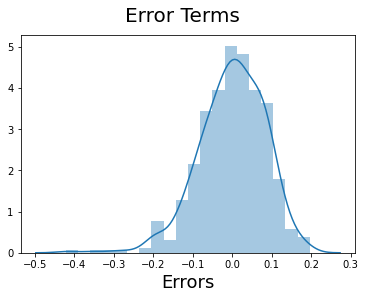

In [89]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [90]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Rain/Snow,Mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,3065,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,872,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,240,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,884,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,736,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### Making Predictions using the Final Model

Now that we have fitted the model and checked the normality of error terms, let's go ahead and make predictions using the final, i.e. Model 5

#### Applying scaling to the test data set and transform the data

In [91]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [92]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [93]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [94]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

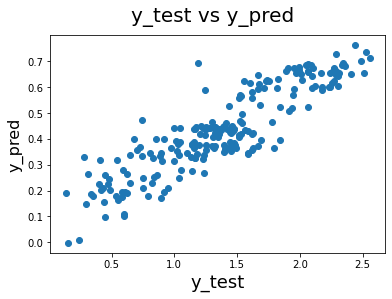

In [95]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [96]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     278.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          8.11e-205
Time:                        23:41:11   Log-Likelihood:                 540.51
No. Observations:                 510   AIC:                            -1057.
Df Residuals:                     498   BIC:                            -1006.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4267      0.012     

According to our final Model i.e., Model 5, the equation of our best fitted line is:

$ cnt = 0.2002 \times  yr - 0.1365  \times  holiday - 0.1004\times windspeed + 0.4975\times casual - 0.1629\times Spring + 0.0700\times Sep - 0.1479\times Mon - 0.0765\times Sun - 0.0780\times Tue - 0.2123\times Light Rain/Snow - 0.0589\times Mist$

### Calculation of R-squared score of the model

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-2.2819421396825033